**LAB1 - Temat 1: Convolutional Neural Network cz. I**
- Szymon Rogowski
- <index>

**ŁADOWANIE BIBLIOTEK I DEPENDENCJI**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.datasets import MNIST, FashionMNIST, CIFAR100
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import torchvision.models as models
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns


KeyboardInterrupt



**TRANSFORMACJE DLA ZESTAWÓW DANYCH TRAIN ORAZ TEST (EVALUATE)**

In [2]:
transform_train_mnists = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test_mnists = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
transform_train_cifar = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test_cifar = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

**ETAP ŁADOWANIA DANYCH:**

In [ ]:
train_set_mnist = MNIST(root = 'data/', download = True, train=True, transform=transform_train_mnists)
print(f"MNIST train number of samples = {len(train_set_mnist)}")
validation_set_mnist = MNIST(root = 'data/', download = True, train=False, transform=transform_test_mnists)
print(f"MNIST test number of samples = {len(validation_set_mnist)}")

train_loader_mnist = torch.utils.data.DataLoader(train_set_mnist, batch_size=64, shuffle=True)
test_loader_mnist = torch.utils.data.DataLoader(validation_set_mnist, batch_size=64, shuffle=False)
print("MNIST ready and steady")

MNIST train number of samples = 60000
MNIST test number of samples = 10000
MNIST ready and steady


In [ ]:
train_set_fashion = FashionMNIST(root='./data', download = True, train=True, transform=transform_train_mnists)
print(f"MNIST FASHION test number of samples = {len(train_set_fashion)}")
validation_set_fashion = FashionMNIST(root='./data', download = False, train=False, transform=transform_test_mnists)
print(f"MNIST FASHION number of samples = {len(validation_set_fashion)}")

train_loader_fashion = torch.utils.data.DataLoader(train_set_fashion, batch_size=64, shuffle=True)
test_loader_fashion = torch.utils.data.DataLoader(validation_set_fashion, batch_size=64, shuffle=False)
print("FashionMNIST ready and steady")

MNIST FASHION test number of samples = 60000
MNIST FASHION number of samples = 10000
FashionMNIST ready and steady


In [4]:
train_set_cifar = CIFAR100(root='./data', train=True, download=True, transform=transform_train_cifar)
print(f"CIFAR 100 number of samples = {len(train_set_cifar)}")
validation_set_cifar = CIFAR100(root='./data', train=False, download=True, transform=transform_test_cifar)
print(f"CIFAR 100 number of samples = {len(validation_set_cifar)}")

train_loader_cifar = torch.utils.data.DataLoader(train_set_cifar, batch_size=64, shuffle=True)
test_loader_cifar = torch.utils.data.DataLoader(validation_set_cifar, batch_size=64, shuffle=False)
print("CIFAR100 ready and steady")

100%|██████████| 169001437/169001437 [00:12<00:00, 13057545.97it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
CIFAR 100 number of samples = 50000
Files already downloaded and verified
CIFAR 100 number of samples = 10000
CIFAR100 ready and steady


In [ ]:
def check_samples_mnist(train_set, n=2):
    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(8, 8), dpi=80)
    for ax in axes.flatten():
        idx = np.random.randint(len(train_set))
        img, label = train_set[idx]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Label: {label}')
    plt.show()

In [ ]:
def check_samples_fashion(train_set, n=2):
    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(8, 8), dpi=80)
    fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    for ax in axes.flatten():
        idx = np.random.randint(len(train_set))
        img, label = train_set[idx]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Label: {fashion_classes[label]}')
    plt.show()

In [ ]:
def check_samples_cifar100(train_set_cifar, n=2):
    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(8, 8), dpi=80)
    for ax in axes.flatten():
        idx = np.random.randint(len(train_set_cifar))
        img, label = train_set_cifar[idx]
        img = np.transpose(img, (1, 2, 0))
        ax.imshow(img.squeeze(), cmap='gray')
        ax.axis('off')
        ax.set_title(str(label))
    # plt.tight_layout()
    plt.show()

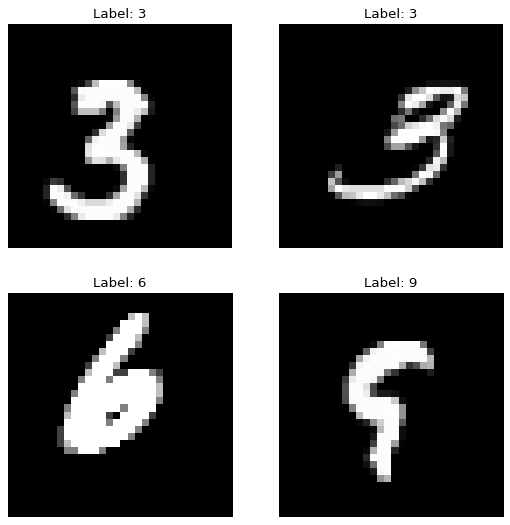

Rozmiar pojedynczego obrazu: torch.Size([1, 32, 32])


In [ ]:
check_samples_mnist(train_set_mnist)
sample_image, label = train_set_mnist[0]
print("Rozmiar pojedynczego obrazu:", sample_image.shape)

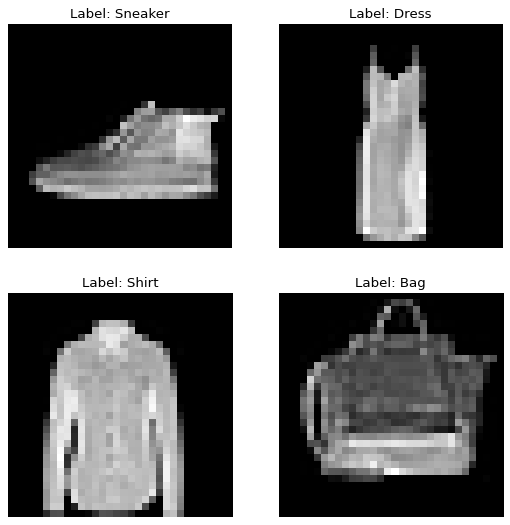

Rozmiar pojedynczego obrazu: torch.Size([1, 32, 32])


In [ ]:
check_samples_fashion(train_set_fashion)
sample_image, label = train_set_fashion[0]
print("Rozmiar pojedynczego obrazu:", sample_image.shape)

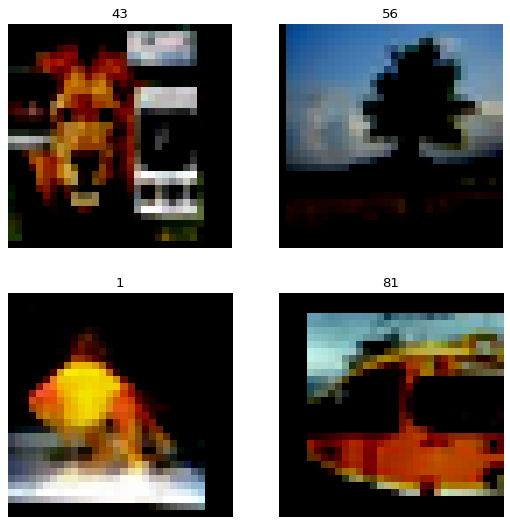

Rozmiar pojedynczego obrazu: torch.Size([3, 32, 32])


In [ ]:
check_samples_cifar100(train_set_cifar)
sample_image, label = train_set_cifar[0]
print("Rozmiar pojedynczego obrazu:", sample_image.shape)

**DEFINIOWANIE ARCHITEKTURY KLAS MODELI**

In [ ]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

In [ ]:
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        # self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.dropout1 = nn.Dropout(0.25)
        # self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        # x = nn.functional.relu(self.conv3(x))
        # x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

In [ ]:
# https://d2l.ai/chapter_convolutional-modern/resnet.html
# https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8
# import torchvision.models as models
# model_resnet = models.resnet18(pretrained=False)

"""
TODO: Fix
"""
# class ResidualBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, stride=1):
#         super(ResidualBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(out_channels)
#         self.relu = nn.ReLU(inplace=True)
#         self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(out_channels)

#         self.downsample = None
#         if stride != 1 or in_channels != out_channels:
#             self.downsample = nn.Sequential(
#                 nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(out_channels)
#             )

#     def forward(self, x):
#         identity = x

#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)

#         out = self.conv2(out)
#         out = self.bn2(out)

#         if self.downsample is not None:
#             identity = self.downsample(x)

#         out += identity
#         out = self.relu(out)

#         return out

# class ResNet10(nn.Module):
#     def __init__(self, num_classes=100):
#         super(ResNet10, self).__init__()
#         self.in_channels = 64
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.relu = nn.ReLU(inplace=True)
#         self.layer1 = self.make_layer(64, 2, stride=1)
#         self.layer2 = self.make_layer(128, 2, stride=2)
#         self.layer3 = self.make_layer(256, 2, stride=2)
#         self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(256, num_classes)

#     def make_layer(self, out_channels, blocks, stride):
#         strides = [stride] + [1] * (blocks - 1)
#         layers = []
#         for stride in strides:
#             layers.append(ResidualBlock(self.in_channels, out_channels, stride))
#             self.in_channels = out_channels
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.avg_pool(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
#         return x

'\nTODO: Fix\n'

**FUNKCJE STRATY I OPTYMALIZATORY**

In [ ]:
# MNIST
model_mnist = CNN_1()
criterion_mnist = nn.CrossEntropyLoss()
optimizer_mnist = optim.SGD(model_mnist.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [ ]:
# FASHION
model_fashion = CNN_2()
criterion_fashion = nn.CrossEntropyLoss()
# optimizer_fashion = optim.SGD(model_fashion.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
# optimizer_fashion = optim.RMSprop(model_fashion.parameters(), lr=0.001, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
optimizer_fashion = optim.Adam(model_fashion.parameters())

In [5]:
# CIFAR
"""
Learning process took hours, idk if I've made mistake somewhare or it is as it should be.
"""
# model_cifar = ResNet10()
"""
So i take premade model from Pytorch library, no time to reimplement.
"""
model_cifar = models.resnet18(weights=None)
num_ftrs = model_cifar.fc.in_features
model_cifar.fc = nn.Linear(num_ftrs, 100)
criterion_cifar = nn.CrossEntropyLoss()
# optimizer_cifar = optim.SGD(model_cifar.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
optimizer_cifar = optim.Adam(model_cifar.parameters())

# import timm
# model_cifar = timm.create_model('resnet18', num_classes=100, in_chans=3, pretrained=False)

**FAZA TRENOWANIA MODELI I EWALUACJI**

In [6]:
def train_model(model, loader, criterion, optimizer, epochs):
    losses = []
    accuracies = []
    f1_scores = []
    for epoch in range(epochs):
        running_loss = 0.0
        running_accuracy = 0.0
        running_f1_score = 0.0

        epoch_predictions = []
        epoch_true_labels = []

        for i, data in enumerate(loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            accuracy = accuracy_score(labels, predicted)
            f1 = f1_score(labels, predicted, average='weighted')
            running_accuracy += accuracy
            running_f1_score += f1

            epoch_predictions.extend(predicted.tolist())
            epoch_true_labels.extend(labels.tolist())
            if i % 100 == 99:
                avg_loss = round(running_loss / 100, 3)
                avg_accuracy = round(running_accuracy / 100, 3)
                avg_f1 = round(running_f1_score / 100, 3)
                print(f"[{epoch + 1}, {i + 1}] loss: {avg_loss} accuracy: {avg_accuracy * 100}% f1_score {avg_f1}")
                losses.append(avg_loss)
                accuracies.append(avg_accuracy)
                f1_scores.append(avg_f1)
                running_loss = 0.0
                running_accuracy = 0.0
                running_f1_score = 0.0
    return losses, accuracies, f1_scores

def evaluate_model(dataset_name, model, loader):
  correct = 0
  total = 0
  predictions = []
  true_labels = []
  with torch.no_grad():
      for data in loader:
          images, labels = data
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          predictions.extend(predicted.tolist())
          true_labels.extend(labels.tolist())
  print(f"{dataset_name} accuracy on the test set: {100 * correct / total:.2f}%")
  return predictions, true_labels

In [7]:
def train_and_evaluate(dataset_name, model, loader, criterion, optimizer, epochs):
  print("TRAINING PHASE...")
  losses, accuracies, f1_scores = train_model(model, loader, criterion, optimizer, epochs)
  print("TRAINING PHASE DONE.")
  print("EVALUATION SCORE")
  predictions, true_labels = evaluate_model(dataset_name, model, loader)
  return losses, accuracies, f1_scores, predictions, true_labels

**UCZENIE I EWALUACJA SIECI, WYKRESY ORAZ MACIERZ POMYŁEK**

In [8]:
def plot_metrics(losses, accuracies, f1_scores, dataset_name):
    epochs = len(losses)
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.plot(range(1, epochs + 1), losses, label='Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss over Epochs - {dataset_name}')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(range(1, epochs + 1), accuracies, label='Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Percentage')
    plt.title(f'Accuracy over Epochs - {dataset_name}')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(range(1, epochs + 1), f1_scores, label='F1-score', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Percentage')
    plt.title(f'F1-score over Epochs - {dataset_name}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [9]:
def plot_confusion_matrix(true_labels, predicted_labels, dataset_name):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

In [ ]:
losses_mnist, accuracies_mnist, f1_scores_mnist, predictions_mnist, true_labels_mnist = train_and_evaluate("MNIST", model_mnist, train_loader_mnist, criterion_mnist, optimizer_mnist, epochs=10)

TRAINING PHASE...
[1, 100] loss: 2.124 accuracy: 24.8% f1_score 0.19
[1, 200] loss: 0.718 accuracy: 76.7% f1_score 0.761
[1, 300] loss: 0.33 accuracy: 89.60000000000001% f1_score 0.896
[1, 400] loss: 0.26 accuracy: 91.7% f1_score 0.916
[1, 500] loss: 0.207 accuracy: 93.60000000000001% f1_score 0.936
[1, 600] loss: 0.19 accuracy: 94.3% f1_score 0.943
[1, 700] loss: 0.149 accuracy: 95.39999999999999% f1_score 0.954
[1, 800] loss: 0.135 accuracy: 95.8% f1_score 0.958
[1, 900] loss: 0.133 accuracy: 95.8% f1_score 0.958
[2, 100] loss: 0.105 accuracy: 96.6% f1_score 0.966
[2, 200] loss: 0.1 accuracy: 96.89999999999999% f1_score 0.969
[2, 300] loss: 0.111 accuracy: 96.5% f1_score 0.965
[2, 400] loss: 0.1 accuracy: 96.8% f1_score 0.968
[2, 500] loss: 0.1 accuracy: 97.2% f1_score 0.972
[2, 600] loss: 0.101 accuracy: 97.1% f1_score 0.97
[2, 700] loss: 0.091 accuracy: 97.39999999999999% f1_score 0.974
[2, 800] loss: 0.078 accuracy: 97.6% f1_score 0.976
[2, 900] loss: 0.089 accuracy: 97.1% f1_scor

PLOTING FAZE: MNIST


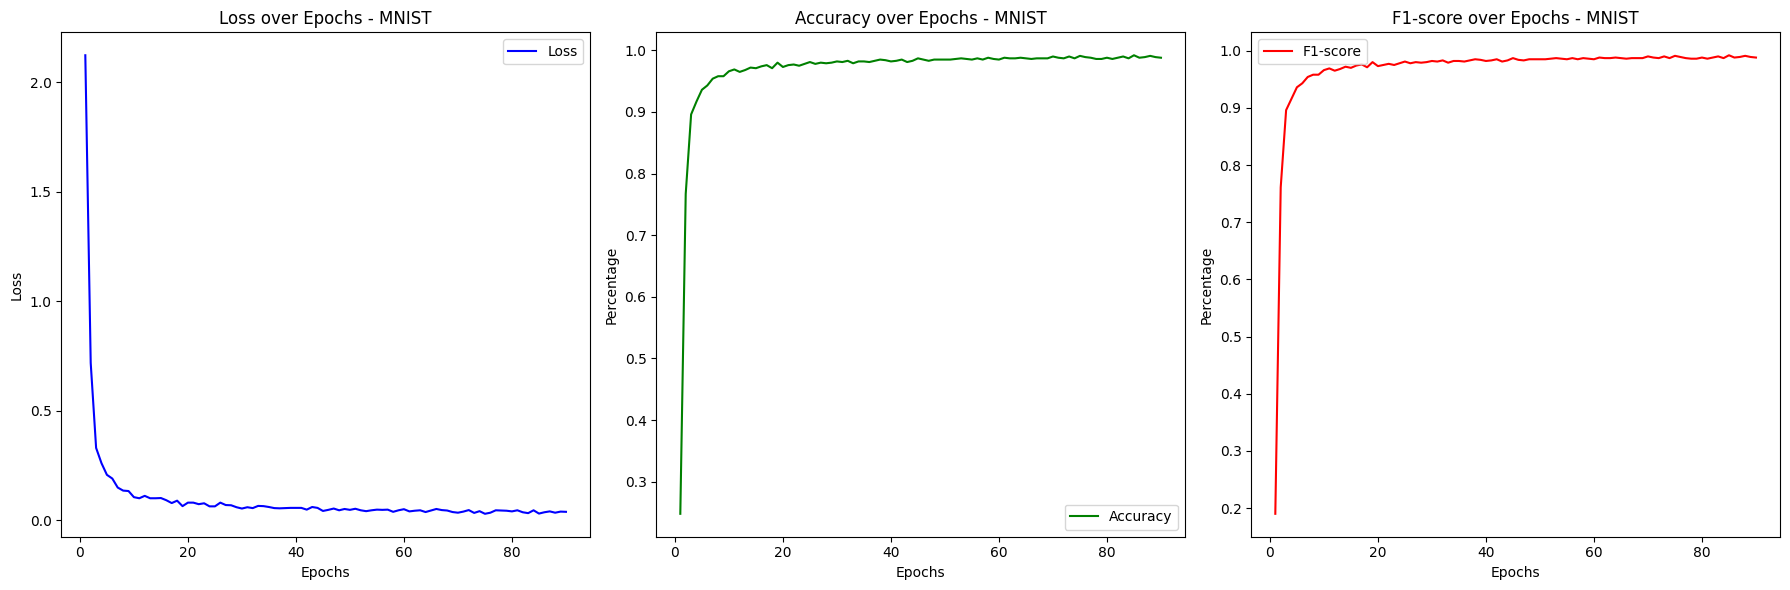

In [ ]:
print("PLOTING FAZE: MNIST")
plot_metrics(losses_mnist, accuracies_mnist, f1_scores_mnist, "MNIST")

CONFUSSION MATRIXES FAZE: MNIST


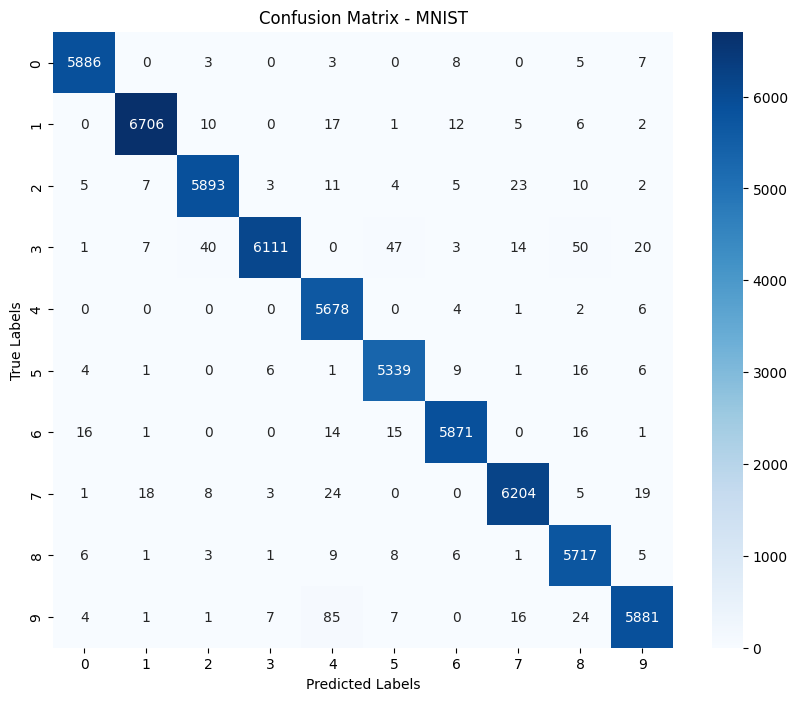

In [ ]:
print("CONFUSSION MATRIXES FAZE: MNIST")
plot_confusion_matrix(predictions_mnist, true_labels_mnist, "MNIST")

In [ ]:
losses_fashion, accuracies_fashion, f1_scores_fashion, predictions_fashion, true_labels_fashion = train_and_evaluate("MNIST_FASHION", model_fashion, train_loader_fashion, criterion_fashion, optimizer_fashion, epochs=10)

TRAINING PHASE...
[1, 100] loss: 0.948 accuracy: 64.8% f1_score 0.625
[1, 200] loss: 0.633 accuracy: 76.1% f1_score 0.751
[1, 300] loss: 0.56 accuracy: 78.60000000000001% f1_score 0.78
[1, 400] loss: 0.518 accuracy: 81.0% f1_score 0.805
[1, 500] loss: 0.488 accuracy: 82.0% f1_score 0.816
[1, 600] loss: 0.469 accuracy: 82.89999999999999% f1_score 0.825
[1, 700] loss: 0.439 accuracy: 83.89999999999999% f1_score 0.836
[1, 800] loss: 0.434 accuracy: 84.0% f1_score 0.839
[1, 900] loss: 0.413 accuracy: 84.6% f1_score 0.843
[2, 100] loss: 0.409 accuracy: 84.7% f1_score 0.845
[2, 200] loss: 0.366 accuracy: 86.3% f1_score 0.861
[2, 300] loss: 0.378 accuracy: 86.1% f1_score 0.861
[2, 400] loss: 0.38 accuracy: 85.9% f1_score 0.858
[2, 500] loss: 0.354 accuracy: 87.0% f1_score 0.868
[2, 600] loss: 0.347 accuracy: 87.8% f1_score 0.877
[2, 700] loss: 0.341 accuracy: 87.5% f1_score 0.874
[2, 800] loss: 0.318 accuracy: 88.8% f1_score 0.887
[2, 900] loss: 0.336 accuracy: 87.9% f1_score 0.878
[3, 100] l

PLOTING FAZE: FASHION MNIST


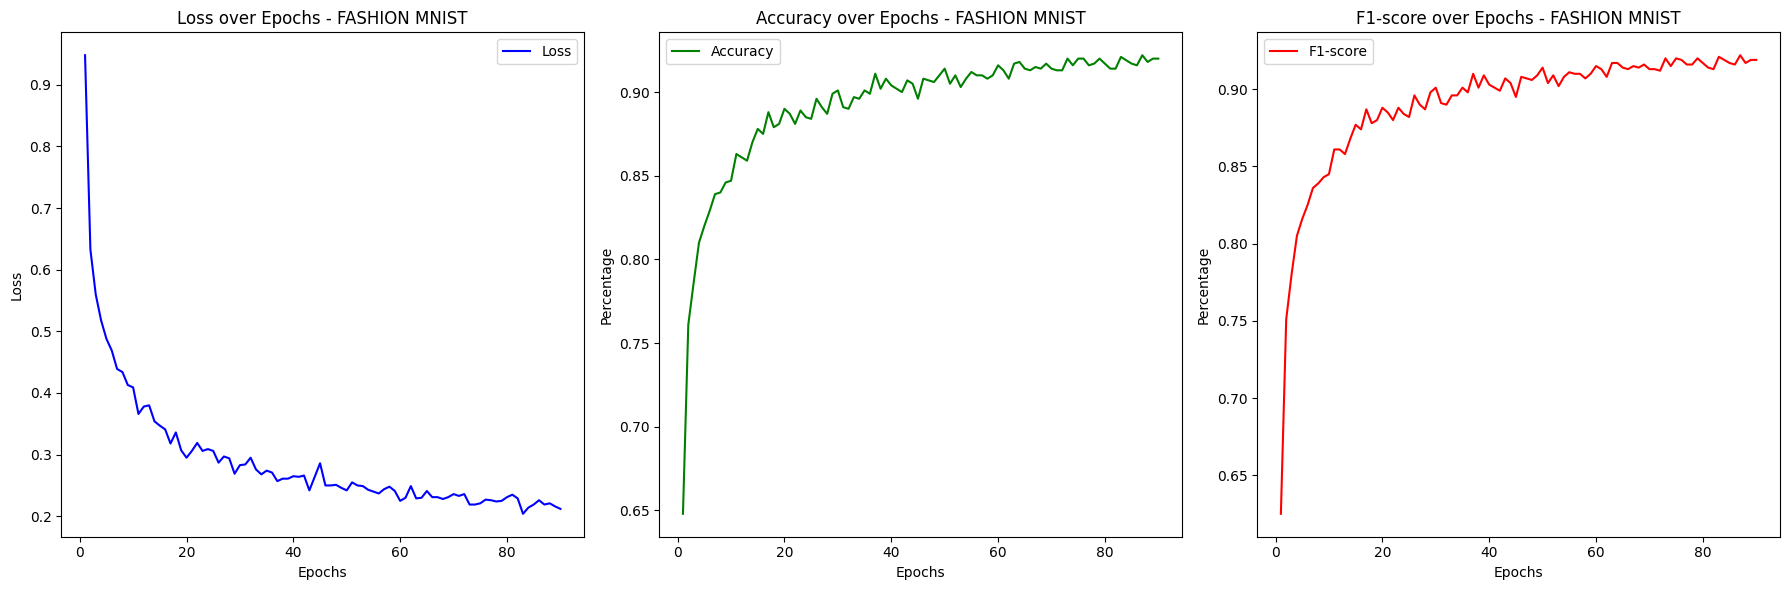

In [ ]:
print("PLOTING FAZE: FASHION MNIST")
plot_metrics(losses_fashion, accuracies_fashion, f1_scores_fashion, "FASHION MNIST")

CONFUSSION MATRIXES FAZE: FASHION MNIST


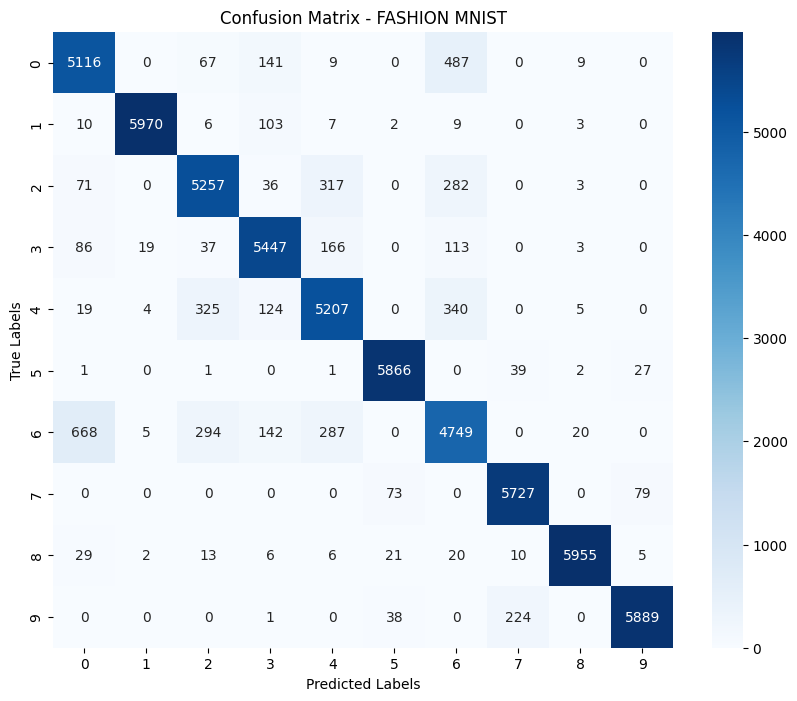

In [ ]:
print("CONFUSSION MATRIXES FAZE: FASHION MNIST")
plot_confusion_matrix(predictions_fashion, true_labels_fashion, "FASHION MNIST")

In [10]:
losses_cifar, accuracies_cifar, f1_scores_cifar, predictions_cifar, true_labels_cifar = train_and_evaluate("CIFAR_100", model_cifar, train_loader_cifar, criterion_cifar, optimizer_cifar, epochs=10)

TRAINING PHASE...
[1, 100] loss: 4.371 accuracy: 5.1% f1_score 0.038
[1, 200] loss: 4.007 accuracy: 8.5% f1_score 0.068
[1, 300] loss: 3.865 accuracy: 10.2% f1_score 0.087
[1, 400] loss: 3.783 accuracy: 11.799999999999999% f1_score 0.103
[1, 500] loss: 3.68 accuracy: 13.3% f1_score 0.12
[1, 600] loss: 3.644 accuracy: 13.8% f1_score 0.126
[1, 700] loss: 3.522 accuracy: 15.9% f1_score 0.147
[2, 100] loss: 3.366 accuracy: 18.0% f1_score 0.17
[2, 200] loss: 3.331 accuracy: 19.2% f1_score 0.182
[2, 300] loss: 3.295 accuracy: 19.900000000000002% f1_score 0.189
[2, 400] loss: 3.265 accuracy: 20.0% f1_score 0.192
[2, 500] loss: 3.149 accuracy: 23.0% f1_score 0.224
[2, 600] loss: 3.141 accuracy: 22.3% f1_score 0.214
[2, 700] loss: 3.074 accuracy: 23.599999999999998% f1_score 0.229
[3, 100] loss: 3.01 accuracy: 24.5% f1_score 0.24
[3, 200] loss: 2.925 accuracy: 26.3% f1_score 0.254
[3, 300] loss: 2.882 accuracy: 26.6% f1_score 0.262
[3, 400] loss: 2.863 accuracy: 27.6% f1_score 0.274
[3, 500] lo

PLOTING FAZE: CIFAR 100


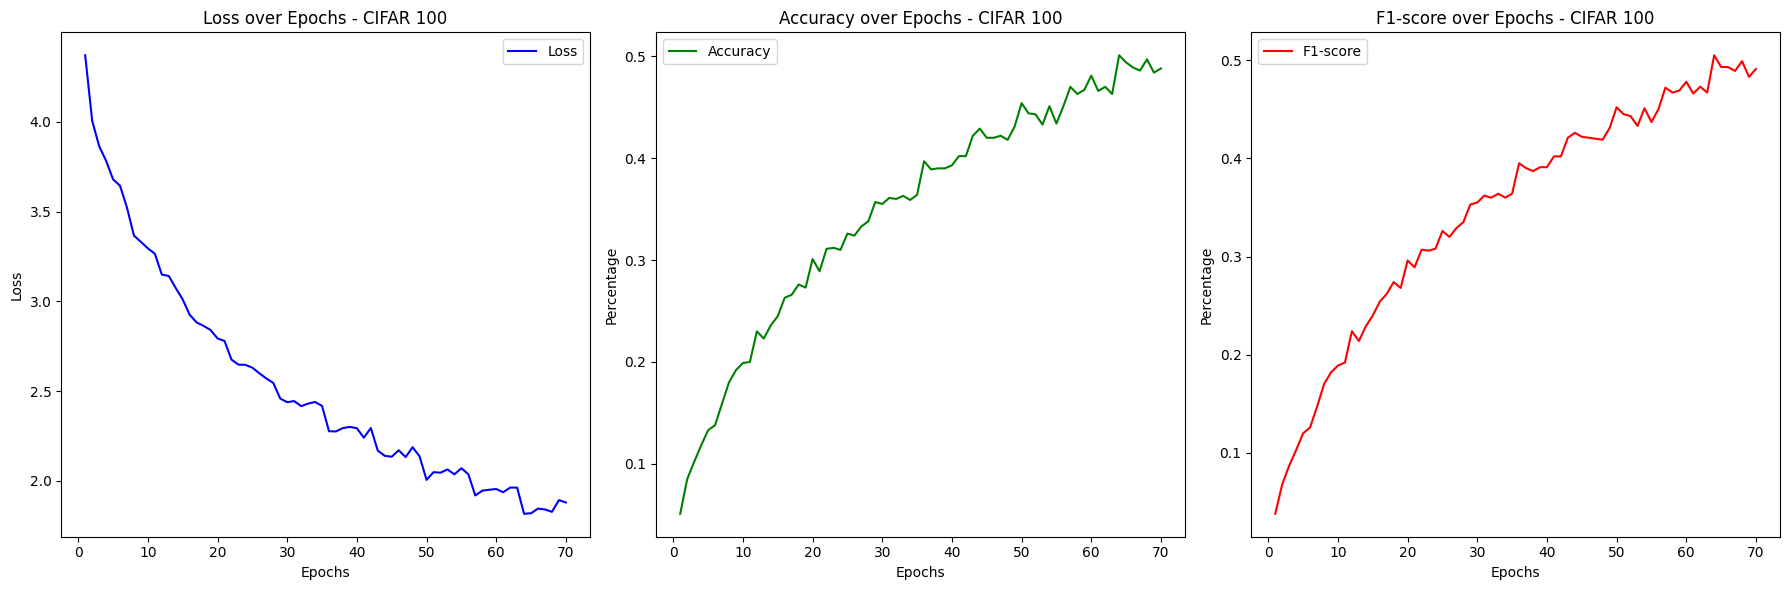

In [11]:
print("PLOTING FAZE: CIFAR 100")
plot_metrics(losses_cifar, accuracies_cifar, f1_scores_cifar, "CIFAR 100")

CONFUSSION MATRIXES FAZE: CIFAR 100


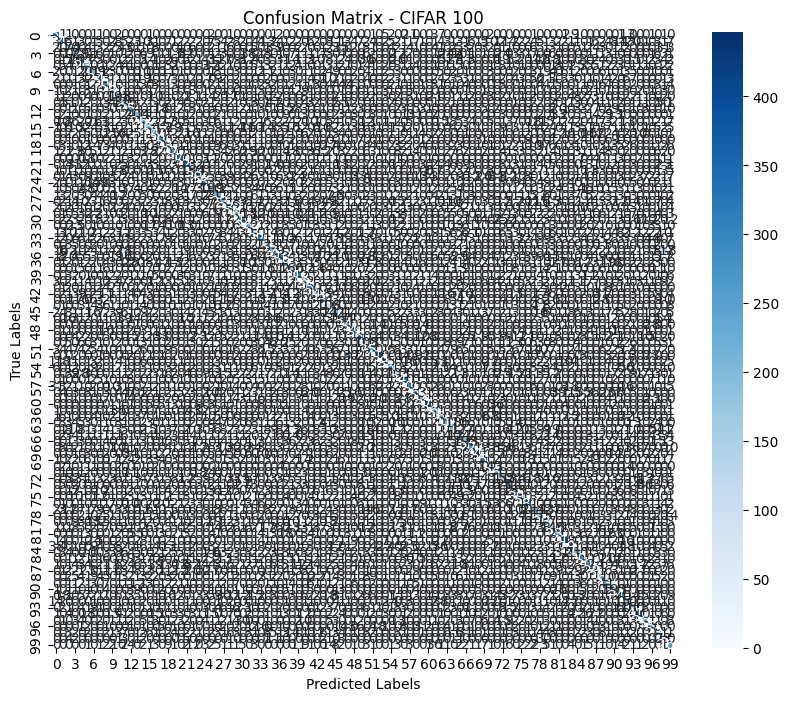

In [12]:
print("CONFUSSION MATRIXES FAZE: CIFAR 100")
plot_confusion_matrix(predictions_cifar, true_labels_cifar, "CIFAR 100")

**AVERAGE SCORES**

In [14]:
data = {
    "Dataset": ["MNIST", "FASHION MNIST", "CIFAR100"],
    "Loss": [0.035, 0.21, 1.82],
    "Accuracy %": [98.6, 92, 51.5],
    "F1 Score": [0.989, 0.922, 0.496]
}
df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+---------------+--------+--------------+------------+
|    | Dataset       |   Loss |   Accuracy % |   F1 Score |
+====+===============+========+==============+============+
|  0 | MNIST         |  0.035 |         98.6 |      0.989 |
+----+---------------+--------+--------------+------------+
|  1 | FASHION MNIST |  0.21  |         92   |      0.922 |
+----+---------------+--------+--------------+------------+
|  2 | CIFAR100      |  1.82  |         51.5 |      0.496 |
+----+---------------+--------+--------------+------------+


**PODSUMOWANIE**



---
Jakich warstw użyłeś/użyłaś w swoim modelu? Dlaczego? Dlaczego dobrałeś/dobrałaś takie parametry?
- Warstwy oraz ich kolejności, jak i parametry, zostały dobrane na podstawie empirycznych testów, wykorzystałem zaimplementowane własnoręcznie klasyczne sieci CNN. Zawierają one warstwy:
konwolucyjne (ekstrakcja cech w konwolucji), poolingowe (redukcja wymiarów), dropoutowe (regularyzacja, wprowadzając elementy losowości) i linearne (klasyfikacja do kategorii).
- Warto zaznaczyć że rozmiar kernela, musi być mniejszy, równy lub większy niż rozmiar obrazu wejściowego. Zbyt duża liczba warstw oraz neuronów w warstwie może wzmacniać zjawisko przeuczenia, bądź na zjawisko zanikania gradientu. Zdjęcia większych rozmiarów wymagają na ogół większych kerneli. Są one również przydatne podczas wykrywania większych struktur, zaś większa liczba detali wymaga mniejszych jąder - według literatury, najczęste wybory to kernele: 3x3 oraz 5x5, w klasycznych przypadkach.
- Większy stride powoduje zmniejszenie rozmiaru danych wyjściowych.
Zaś padding jest użyteczny, aby zachować rozmiar danych wejściowych na wyjściu warstwy konwolucyjnej.
- Dla zestawu CIFAR100, po początkowych niskich wynikach wskaźnika Accurancy (rzędu 32%) postanowiłem wykorzystać sugerowany przez prace naukowe, model typu ResNet o 10 i 18 warstwach. Ten pierwszy zaimplementowałem ręcznie i miałem zamiar finalnie użyć ale poprostu brakło czasu na więcej testów. Z tego powodu wykorzystałem implementację biblioteczną. Ta architektura korzysta z warstw Rezydualnych, które są bardzo skuteczne w przeciwdziałaniu zanikania gradientu i uczeniu się skomplikowanych wzorców.

---

Narysuj przebieg funkcji straty oraz wybranych dwóch innych metryk (matplotlib albo wykorzystaj wbudowane funkcje w PyTorch). Co z nich wynika? Czym jest overfitting czym jest underfitting? Jaki mechanizm można zastosować żeby uniknać przeuczenia? Jak uniknąć niedouczenia?
- Ewaluacje przeprowadziłem tylko dla wskaźnika Accuracy. Powinien być to decydujący parametr. Dla Mnist średnio wyniki 98%, Fashion Mnist 92% i dla zbioru CIFAR100 uzyskałem 52%. Wszystkie zostały wytrenowane na tej samej długości 10 epok.
- Ogólna tendencja wykresów w wszystkich przypadków jest prawidłowa. Widać raczej szybkie spadki wartości loss co sugeruje poprawną minimalizację błędu predykcji.
- Overfitting występuje, gdy model zbyt dobrze dopasowuje się do danych treningowych, ale słabo radzi sobie w przypadku walidacji. Przeciwdziałanie to zastosowanie procesów regularyzacji, takich jak dropout, L1/L2.
- Zaś underfitting występuje, gdy model jest zbyt prosty lub mało dopasowany do danych treningowych. Co skutkuje w obu przypadkach słabymi wynikami. Przeciwdziałanie polega na zwiększenie złożoności modelu poprzez zmiane architektury sieci.
- Zjawsika te powinny być zbadane nałożeniem wykresów loss dla zbioru treningowego i testowego - uwzględniono tylko dla testowego. W przypadku underfittingu funkcja straty będzie relatywnie wysoka zarówno dla testu jak i treningu. Natomiast w przypadku overfittingu funkcja straty zbioru treningowego będzie maleć, jednocześnie funkcja straty zbiory walidacyjnego będzie rosła.
- Jednakże same wartości accurancy również dostarczają nam odpowiedzi. Bodajże w przypadku underfittingu, model nie jest w stanie dobrze dopasować się do danych treningowych, co prowadzi do niskiego accurancy zarówno na zbiorze treningowym, jak i testowym. Wskaźnik acc będzie więc niski dla obu zbiorów danych - relatywnie słabe nauczenie modelu. W przypadku 1 i 2 datasetu raczej wyniki były zadowolające, taką diagnostykę można by przeprowadzić dla cifaru jedynie uważam.

---
Jakich optymalizatorów oraz funkcji straty użyłeś/aś? Dlaczego? Jakich
parametrów? Za co odpowiada optymalizator w procesie uczenia?
- Wedle książki "Deep Learning", Ian Goodfellow, Yoshua Bengio, Aaron Courville najlepszym wyborem dla klasyfikacji wielorakiej będzie funkcja aktywacji typu log_softmax, która przekształca wyniki wyjściowe modelu na logarytmy prawdopodobieństw dla poszczególnych klas. Zaś funkcja straty to CrossEntropyLoss, która oczekuje, że wyjście modelu będzie zawierać wartości zmiennoprzecinkowe. Będą one interpretowane jako logarytmy nieznormalizowanych prawdopodobieństw przynależności do każdej z klas.
- Optymalizator jest odpowiedzialny za aktualizację wag modelu na podstawie gradientów funkcji straty. Minimalizuje funkcję straty poprzez iteracyjne dostosowywanie wag, bodajżę w kierunku przeciwnym do gradientu. Optymalizator decyduje o tym, jakie są kroki aktualizacji wag oraz jakie są ich kierunki.
- Wybrałem optymalizator Adam z uwagu na adaptacyjność, automatyczności adaptacji parametrów i powszechność zastosowania. SGD to klasyczna metoda, jednak relatywnie prosta. Opłaca ten fakt mniejszą stabilnością oraz wolniejszą zbieżnoscią, co potwierdziły moje testy. RMSprop również podlegał testom, będący konkurencyjnym wyborem dla Adama, również adaptacyjny.

---

Każdy model, dla każdego datasetu uruchom 5razy. Uśrednij wyniki i przedstaw to w formie tabelki(może być tabelka dataframe z pandas i wykorzystać from tabulate import tabulate do wyświetlenia tego w ładniejszy sposób).
- Wyniki zostały uśrednione w osobnym skrypcie, tabelka widoczna powyżej.

---
Przygotuj macierz pomyłek dla każdego swojego modelu.
- Implementacja określa fakt, że każdy wiersz reprezentuje rzeczywistą klasę, a każda kolumna reprezentuje przewidywaną klasę przez model. Występują w niej wartości 4 typów: Prawdziwie pozytywne (True Positives), Prawdziwie negatywne (True Negatives), Fałszywie pozytywne (False Positives) oraz Fałszywie negatywne (False Negatives).
- W idealnej sytuacji większość wyników powinna znajdować się na przekątnej głównej (diagonali), co oznacza, że prawdziwe klasyfikacje są zgodne z przewidywanymi. Jest to sytuacja obserwowalna w moich wynikach.